# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Starting URL for Weather Map API call

url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

#list of city data
city_data = []

#print to logger
print("Beginning Data Retrieval")
print("-" * 15)

#create counters
record_count = 1
set_count = 1

#loop through all the cities in the list 
for index, city, in enumerate(cities):
    #group cities in sets of 50 for logging purpose
    if (index % 50 == 0 and index >= 50):
        set_count +=1
        record_count = 0
    #create endpoint URL with each city
    city_url = url + "&q=" + city 
    
    #log the url record and set number
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    
    record_count += 1
    
    #Run an API request for each of the cities
    try: 
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        #extract out max temp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #append the city info into city data
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Data": city_data
        })
    except:
        print("City not found. Skipping...")
        pass
    
#indicate that data loading is complete
print("---------------")
print("Data Retrieval Complete")
print("---------------")

Beginning Data Retrieval
---------------
Processing Record 1 of set 1 | yellowknife
Processing Record 2 of set 1 | berlevag
Processing Record 3 of set 1 | beloha
Processing Record 4 of set 1 | khatanga
Processing Record 5 of set 1 | namibe
Processing Record 6 of set 1 | codrington
Processing Record 7 of set 1 | bafata
Processing Record 8 of set 1 | cape town
Processing Record 9 of set 1 | faya
Processing Record 10 of set 1 | katsuura
Processing Record 11 of set 1 | albany
Processing Record 12 of set 1 | chokurdakh
Processing Record 13 of set 1 | rikitea
Processing Record 14 of set 1 | korla
Processing Record 15 of set 1 | namatanai
Processing Record 16 of set 1 | ust-tsilma
Processing Record 17 of set 1 | gerash
Processing Record 18 of set 1 | san patricio
Processing Record 19 of set 1 | geraldton
Processing Record 20 of set 1 | barrow
Processing Record 21 of set 1 | tilichiki
Processing Record 22 of set 1 | petropavlovsk-kamchatskiy
Processing Record 23 of set 1 | mataura
Processing R

Processing Record 36 of set 4 | huambo
Processing Record 37 of set 4 | araouane
Processing Record 38 of set 4 | konstantinovka
Processing Record 39 of set 4 | darnah
Processing Record 40 of set 4 | para de minas
Processing Record 41 of set 4 | ribeira grande
Processing Record 42 of set 4 | samarai
Processing Record 43 of set 4 | la ronge
Processing Record 44 of set 4 | deputatskiy
Processing Record 45 of set 4 | maldonado
Processing Record 46 of set 4 | klaksvik
Processing Record 47 of set 4 | tuktoyaktuk
Processing Record 48 of set 4 | sinnamary
Processing Record 49 of set 4 | barentsburg
City not found. Skipping...
Processing Record 0 of set 5 | broken hill
Processing Record 1 of set 5 | kapaa
Processing Record 2 of set 5 | bela
Processing Record 3 of set 5 | tabiauea
City not found. Skipping...
Processing Record 4 of set 5 | port elizabeth
Processing Record 5 of set 5 | ostrovnoy
Processing Record 6 of set 5 | padang
Processing Record 7 of set 5 | dingle
Processing Record 8 of set 5

Processing Record 26 of set 8 | chubbuck
Processing Record 27 of set 8 | rocha
Processing Record 28 of set 8 | sandnessjoen
Processing Record 29 of set 8 | pio ix
Processing Record 30 of set 8 | atambua
Processing Record 31 of set 8 | salina
Processing Record 32 of set 8 | inca
Processing Record 33 of set 8 | soubre
Processing Record 34 of set 8 | barawe
City not found. Skipping...
Processing Record 35 of set 8 | corrente
Processing Record 36 of set 8 | souillac
Processing Record 37 of set 8 | gizo
Processing Record 38 of set 8 | vanino
Processing Record 39 of set 8 | svetlyy
Processing Record 40 of set 8 | barnstead
Processing Record 41 of set 8 | karratha
Processing Record 42 of set 8 | port keats
Processing Record 43 of set 8 | yumen
Processing Record 44 of set 8 | lalmohan
Processing Record 45 of set 8 | martapura
Processing Record 46 of set 8 | kemijarvi
City not found. Skipping...
Processing Record 47 of set 8 | mitsamiouli
Processing Record 48 of set 8 | marawi
Processing Record

Processing Record 16 of set 12 | bella union
Processing Record 17 of set 12 | kaniama
Processing Record 18 of set 12 | arkul
Processing Record 19 of set 12 | maceio
Processing Record 20 of set 12 | mahibadhoo
Processing Record 21 of set 12 | chenghai
Processing Record 22 of set 12 | bom jardim
Processing Record 23 of set 12 | skjervoy
Processing Record 24 of set 12 | dali
Processing Record 25 of set 12 | dunda
Processing Record 26 of set 12 | karaul
City not found. Skipping...
Processing Record 27 of set 12 | kipini
Processing Record 28 of set 12 | quime
Processing Record 29 of set 12 | tete
Processing Record 30 of set 12 | port hardy
Processing Record 31 of set 12 | nauta
Processing Record 32 of set 12 | satitoa
City not found. Skipping...
Processing Record 33 of set 12 | mayumba
Processing Record 34 of set 12 | kaisiadorys
Processing Record 35 of set 12 | neuquen
Processing Record 36 of set 12 | vila velha
Processing Record 37 of set 12 | kenora
Processing Record 38 of set 12 | linji

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#convert array of JSON into Pandas
city_data_df = pd.DataFrame(city_data)

#extract relevant fiels from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.to_csv(output_data_file, index_label = "City_ID")

city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Data          552
dtype: int64

In [6]:
#display the city data frame

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Data
0,yellowknife,62.46,-114.35,-31.00,66,5,4.70,CA,"[{'City': 'yellowknife', 'Lat': 62.46, 'Lng': ..."
1,berlevag,70.86,29.09,25.11,70,12,13.44,NO,"[{'City': 'yellowknife', 'Lat': 62.46, 'Lng': ..."
2,beloha,-25.17,45.05,95.85,27,0,4.94,MG,"[{'City': 'yellowknife', 'Lat': 62.46, 'Lng': ..."
3,khatanga,71.97,102.50,-2.63,97,100,7.11,RU,"[{'City': 'yellowknife', 'Lat': 62.46, 'Lng': ..."
4,namibe,-15.20,12.15,80.60,69,40,5.30,AO,"[{'City': 'yellowknife', 'Lat': 62.46, 'Lng': ..."


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

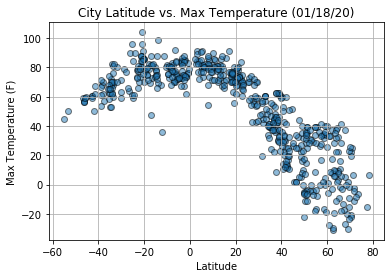

In [7]:
#build scatter plot for latitude vs. temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.5, label="Cities")

#incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
          
#save the figure
plt.savefig("output_data/Fig1.png")

#show plot
plt.show()

#### Latitude vs. Humidity Plot

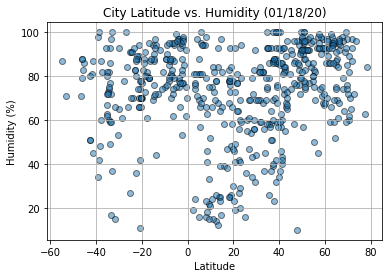

In [8]:
#build scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.5, label="Cities")

#incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
#save the figure
plt.savefig("output_data/Fig2.png")

#show plot
plt.show()

#### Latitude vs. Cloudiness Plot

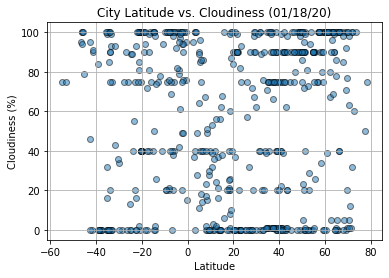

In [9]:
#build scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.5, label="Cities")

#incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
          
#save the figure
plt.savefig("output_data/Fig3.png")

#show plot
plt.show()

#### Latitude vs. Wind Speed Plot

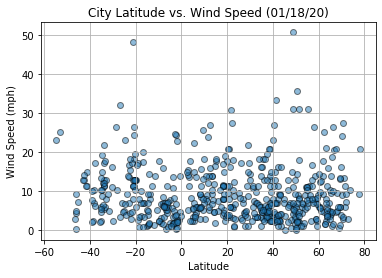

In [10]:
#build scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.5, label="Cities")

#incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
          
#save the figure
plt.savefig("output_data/Fig4.png")

#show plot
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    #run regression on souther hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #plot 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is {rvalue}")
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is -0.8741574310924249


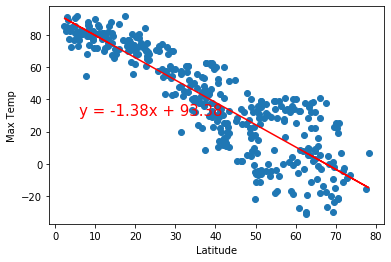

In [13]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is 0.5077353537549943


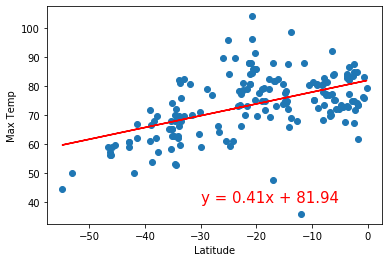

In [14]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-30,40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.4361200687336333


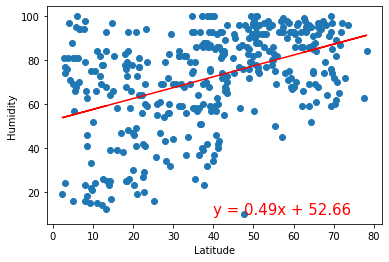

In [15]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is 0.2759397409147292


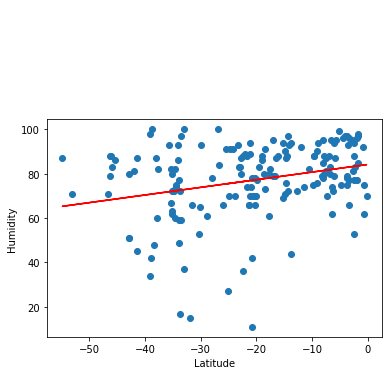

In [16]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-30,150))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.2701073392176925


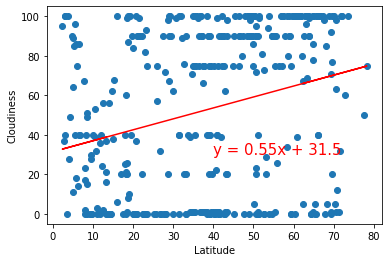

In [17]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is 0.21072603746452342


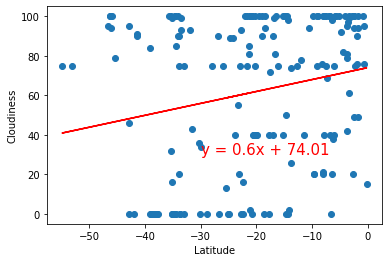

In [18]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is -0.03639154806204328


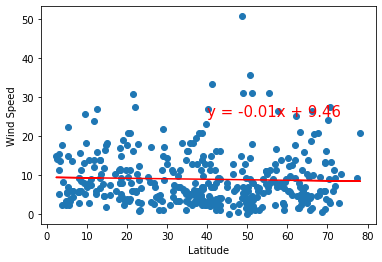

In [19]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is -0.24397683029667944


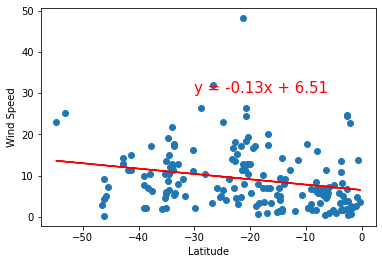

In [20]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-30,30))